In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from numpy.linalg import svd


Image shape: (16, 16)


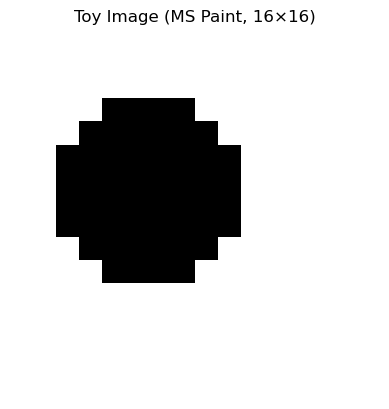

In [ ]:
image_path = r"C:\Desktop\Sem 4\inverse-problems-regularization\images\toy.png"

img = plt.imread(image_path)

if img.ndim == 3:
    img = img.mean(axis=2)

x = img.astype(float)
x /= x.max()

n = x.shape[0]
print("Image shape:", x.shape)

plt.imshow(x, cmap="gray")
plt.title("Toy Image (MS Paint, 16×16)")
plt.axis("off")
plt.show()


In [ ]:
print("Pixel values (matrix form):")
print(np.round(x, 2))
x_vec = x.flatten()
print("Vectorized image shape:", x_vec.shape)

def gaussian_kernel(size=7, sigma=1.5):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel /= kernel.sum()
    return kernel

kernel = gaussian_kernel(size=7, sigma=1.5)


Pixel values (matrix form):
[[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.  ]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.  ]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.  ]
 [1.   1.   1.   1.   0.25 0.25 0.25 0.25 1.   1.   1.   1.   1.   1.
  1.   1.  ]
 [1.   1.   1.   0.25 0.25 0.25 0.25 0.25 0.25 1.   1.   1.   1.   1.
  1.   1.  ]
 [1.   1.   0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 1.   1.   1.   1.
  1.   1.  ]
 [1.   1.   0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 1.   1.   1.   1.
  1.   1.  ]
 [1.   1.   0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 1.   1.   1.   1.
  1.   1.  ]
 [1.   1.   0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 1.   1.   1.   1.
  1.   1.  ]
 [1.   1.   1.   0.25 0.25 0.25 0.25 0.25 0.25 1.   1.   1.   1.   1.
  1.   1.  ]
 [1.   1.   1.   1.   0.25 0.25 0.25 0.25 1.   1.   1.   1.   1.   1.
  1.   1.  ]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.

Matrix A shape: (256, 256)


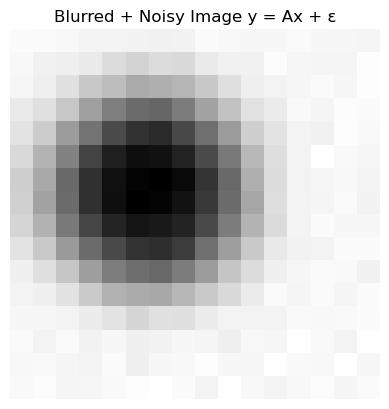

In [ ]:
def build_blur_matrix(kernel, n):
    N = n * n
    A = np.zeros((N, N))
    for i in range(N):
        basis = np.zeros((n, n))
        basis.flat[i] = 1.0
        blurred = convolve2d(basis, kernel, mode="same", boundary="symm")
        A[:, i] = blurred.flatten()
    return A

A = build_blur_matrix(kernel, n)
print("Matrix A shape:", A.shape)

Ax = A @ x_vec

noise_level = 0.01
noise = noise_level * np.random.randn(Ax.size)

y = Ax + noise
y_img = y.reshape(n, n)

plt.imshow(y_img, cmap="gray")
plt.title("Blurred + Noisy Image y = Ax + ε")
plt.axis("off")
plt.show()


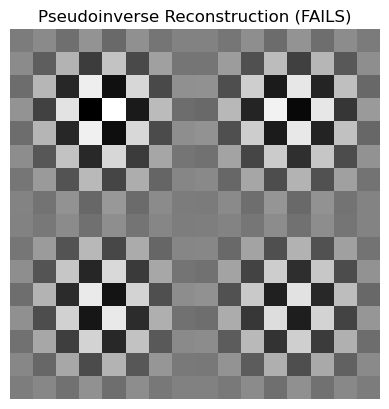

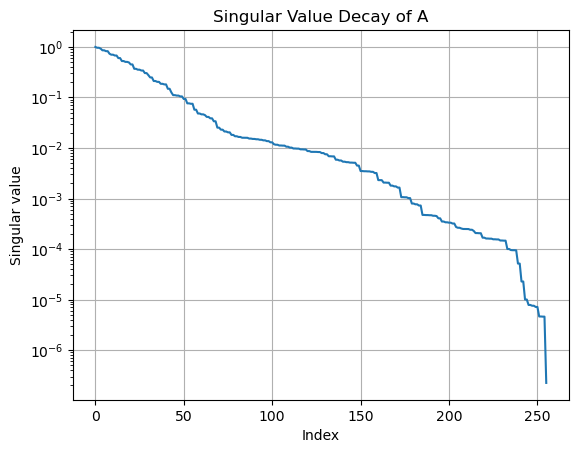

Condition number of A: 4454780.103592261


In [ ]:
U, S, Vt = svd(A, full_matrices=False)

x_pinv = Vt.T @ np.diag(1/S) @ U.T @ y
x_pinv_img = x_pinv.reshape(n, n)

plt.imshow(x_pinv_img, cmap="gray")
plt.title("Pseudoinverse Reconstruction (FAILS)")
plt.axis("off")
plt.show()

plt.semilogy(S)
plt.xlabel("Index")
plt.ylabel("Singular value")
plt.title("Singular Value Decay of A")
plt.grid(True)
plt.show()

print("Condition number of A:", S[0] / S[-1])
